<a href="https://colab.research.google.com/github/sharmigpinheiro-code/sharmi/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    roc_auc_score, confusion_matrix, roc_curve, auc
)

In [11]:
from google.colab import files
data=files.upload()

Saving project.csv to project.csv


In [13]:
df = pd.read_csv("project.csv")
print("✔ Dataset Loaded Successfully!\n")
print(df.head())

✔ Dataset Loaded Successfully!

  Customer_ID  Age  Gender Marital_Status Education_Level Employment_Status  \
0  CUST_00001   59    Male        Married             PhD        Unemployed   
1  CUST_00002   49    Male       Divorced     High School        Unemployed   
2  CUST_00003   35    Male        Married        Bachelor          Employed   
3  CUST_00004   63    Male         Single        Bachelor          Employed   
4  CUST_00005   28  Female        Married          Master          Employed   

   Annual_Income  Credit_Score  Number_of_Credit_Lines  \
0          41442           642                       4   
1          85992           665                       7   
2          58420           683                       8   
3          59733           674                       7   
4          69487           733                       5   

   Credit_Utilization_Ratio  ...  Total_Spend_Last_Year  Defaulted     CLV  \
0                      0.44  ...                  13997          0

In [14]:
X = df.drop("Education_Level", axis=1)
y = df["Education_Level"]

In [15]:
numeric_cols = X.select_dtypes(include=['int64','float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [16]:
preprocess = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

In [17]:
model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("classifier", RandomForestClassifier(n_estimators=200, random_state=42))
])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [19]:
model.fit(X_train, y_train)
print("\n✔ Model Training Completed!")


✔ Model Training Completed!


In [30]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

In [31]:
print("\n============= MODEL PERFORMANCE ============")
print("Accuracy  :", accuracy_score(y_test, y_pred))
print("Precision :", precision_score(y_test, y_pred, average='weighted', zero_division=0))
print("Recall    :", recall_score(y_test, y_pred, average='weighted', zero_division=0))
print("ROC-AUC   :", roc_auc_score(y_test, y_prob, multi_class='ovr', average='weighted'))
print("==============================================\n")


============= MODEL PERFORMANCE ============
Accuracy  : 0.407
Precision : 0.2592920159866159
Recall    : 0.407
ROC-AUC   : 0.507373889033288



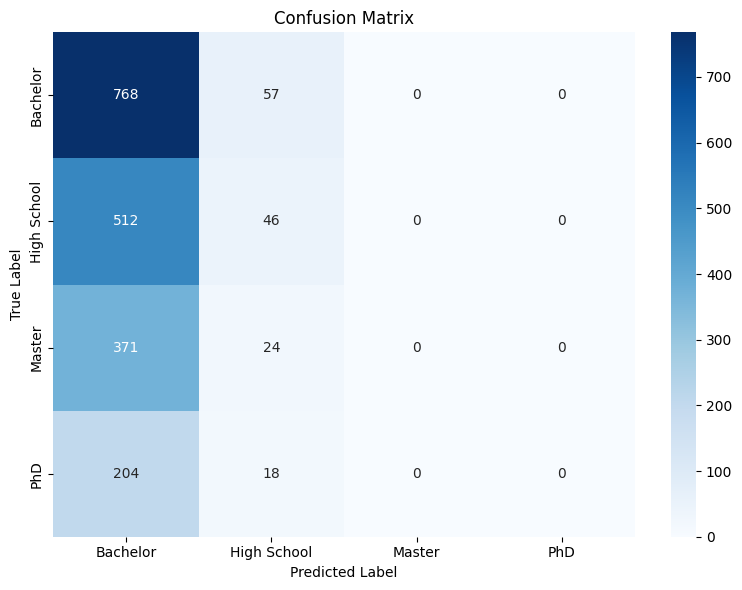

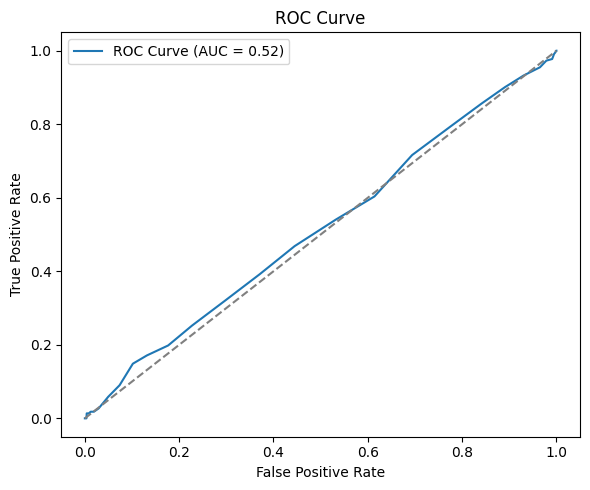

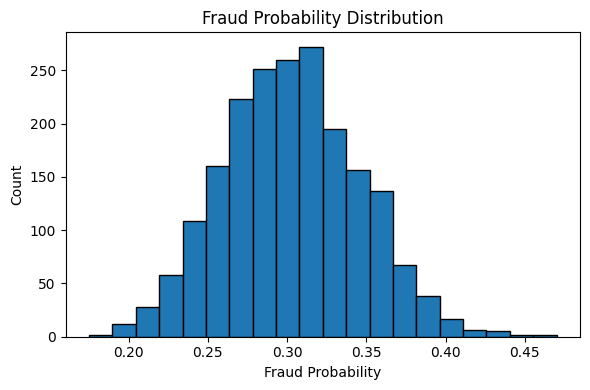

In [51]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6)) # Increased figure size for better readability
class_names = model.classes_ # Get the unique class labels from the trained model
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()
plt.figure(figsize=(6,4))
plt.hist(y_prob, bins=20, edgecolor="black")
plt.title("Fraud Probability Distribution")
plt.xlabel("Fraud Probability")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [48]:
sample = pd.DataFrame([{
    "Customer_ID": "CUST_00014",
    "Age": 60,
    "Gender": "Female",
    "Marital_Status": "Married",
    "Education_Level": "Master",
    "Employment_Status": "Employed",
    "Annual_Income": 66403,
    "Credit_Score": 667,
    "Number_of_Credit_Lines":9,
    "Credit_Utilization_Ratio":0.39,
    "Debt_To_Income_Ratio":0.89,
    "Number_of_Late_Payments":0,
    "Tenure_in_Years":0,
    "Total_Transactions_Last_Year":94,
    "Total_Spend_Last_Year":18710,
    "Defaulted":0,
    "CLV":20444,
    "Total_Transactions":24,
    "Avg_Transaction_Amount":460.506249999999,
    "Max_Transaction_Amount":1779.7,
    "Min_Transaction_Amount":29.17,
    "Fraud_Transactions":2,
    "Unique_Merchant_Categories":10,
    "Unique_Transaction_Cities":15
    }])

pred = model.predict(sample)[0]
prob = model.predict_proba(sample)[0][1]

print("\n=== SAMPLE PREDICTION ===")
print("Fraud Prediction :", pred)
print("Fraud Probability:", prob)



=== SAMPLE PREDICTION ===
Fraud Prediction : Master
Fraud Probability: 0.135
